# rpy2 tests
  > pls use the _**rpy2**_ kernel


## import and setup


In [1]:

import pandas as pd;
import numpy as np;
from matplotlib import pyplot as plt;
from matplotlib import dates as mdates;
import seaborn as sns;

import rpy2;
%load_ext rpy2.ipython

import rpy2.robjects as ro;

from rpy2.robjects import pandas2ri;
from rpy2.robjects import default_converter
from rpy2.robjects.conversion import localconverter;

from rpy2.robjects.packages import importr;

utils = importr("utils");
grdevices = importr('grDevices');
infenergy = importr('infenergy');


def help_r( python_name ):
    print( str( utils.help( python_name.replace('_','.') ) ) );




# read and convert data


In [2]:
data = infenergy.get_inf_meter_data("2014-04-30", "2014-05-01"); # as an r dataframe

with localconverter(ro.default_converter + pandas2ri.converter):
  data_converted = ro.conversion.rpy2py( data );

data_converted = data_converted.reset_index( drop=True );
data_converted.time = data_converted.time.dt.tz_convert('GMT');

data_converted.info()


print( data.head() )

data_converted.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   time    146 non-null    datetime64[ns, GMT]
 1   cumkwh  146 non-null    float64            
dtypes: datetime64[ns, GMT](1), float64(1)
memory usage: 2.4 KB
                  time   cumkwh
6  2014-04-30 07:51:06 12610329
7  2014-04-30 08:01:01 12610356
8  2014-04-30 08:11:01 12610383
9  2014-04-30 08:21:01 12610409
10 2014-04-30 08:31:01 12610434
11 2014-04-30 08:41:01 12610459



,time,cumkwh
0,2014-04-29 23:51:06+00:00,12610329.0
1,2014-04-30 00:01:01+00:00,12610356.0
2,2014-04-30 00:11:01+00:00,12610383.0
3,2014-04-30 00:21:01+00:00,12610409.0
4,2014-04-30 00:31:01+00:00,12610434.0


# Test plots


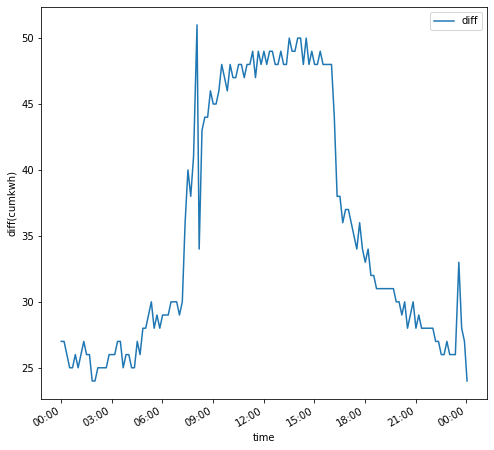


gt.n..> res <- get.inf.meter.data("2014-04-30", "2014-05-01")

gt.n..> with(res, plot(time[-1], diff(cumkwh), type="l"))


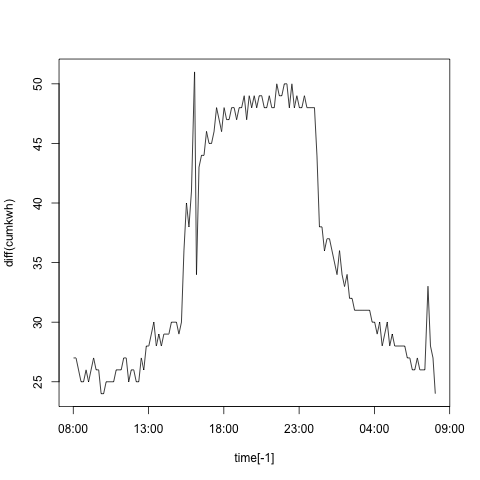

value,[RTYPES.NILSXP]
visible,[RTYPES.LGLSXP]


In [3]:
ax = data_converted.join(data_converted.cumkwh.diff().rename('diff')).dropna().plot( x='time', y='diff', figsize=(8,8) );
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"));
ax.set_xlabel('time');
ax.set_ylabel('diff(cumkwh)');
plt.show();

%R example(get.inf.meter.data)